In [1]:
!conda install -q -y gdown

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.14  |       ha878542_0         152 KB  conda-forge
    certifi-2022.9.14          |     pyhd8ed1ab_0         156 KB  conda-forge
    conda-4.14.0               |   py37h89c1867_0        1010 KB  conda-forge
    filelock-3.8.0             |     pyhd8ed1ab_0          13 KB  conda-forge
    gdown-4.5.1                |     pyhd8ed1ab_0          17 KB  conda-forge
    openssl-1.1.1q             |       h166bdaf_0         2.1 MB  conda-forge
    toolz-0.12.0               |     pyhd8ed1ab_0          48 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLE

In [2]:
#non-lensed
!gdown http://drive.google.com/uc?id=1cRjseeUQhab5TRRb0NDmFxjGdsd0Fwo0

Downloading...
From: http://drive.google.com/uc?id=1cRjseeUQhab5TRRb0NDmFxjGdsd0Fwo0
To: /kaggle/working/hsc2.zip
100%|████████████████████████████████████████| 621M/621M [00:06<00:00, 91.7MB/s]


In [3]:
#lensed
!gdown http://drive.google.com/uc?id=1uPf_1R1V9u26FdhX3ownSpUcz6m6Az6n

Downloading...
From: http://drive.google.com/uc?id=1uPf_1R1V9u26FdhX3ownSpUcz6m6Az6n
To: /kaggle/working/hsc_lens_candidates.zip
100%|██████████████████████████████████████| 7.22M/7.22M [00:00<00:00, 21.7MB/s]


In [4]:
!unzip -q hsc2.zip

In [5]:
!unzip -q hsc_lens_candidates.zip

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pandas as pd
from sklearn import model_selection
plt.rcParams["figure.figsize"] = (20,3)

In [7]:
cls1 = os.listdir("./hsc") # class 1 (non-lensing)
cls2 = os.listdir("./hsc_lens_candidates") # class 2 (lensing)

In [8]:
len(cls1) #no. of lensed images

40010

In [9]:
len(cls2) #no. of non-lensed images

467

In [10]:
cls1 = ['./hsc/' + i for  i in cls1 ]
cls2 = ['./hsc_lens_candidates/' + i for  i in cls2 ]

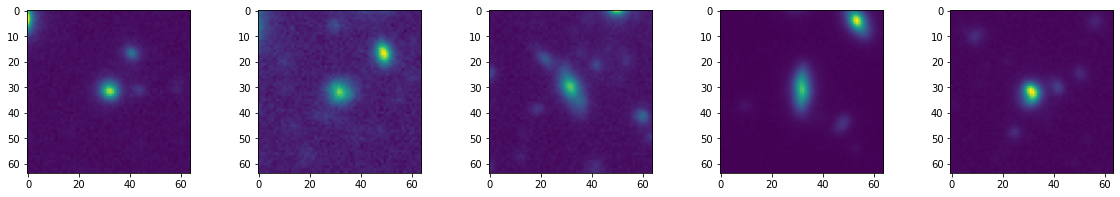

In [11]:
# class 1 plotting
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(np.load(cls1[i])) 

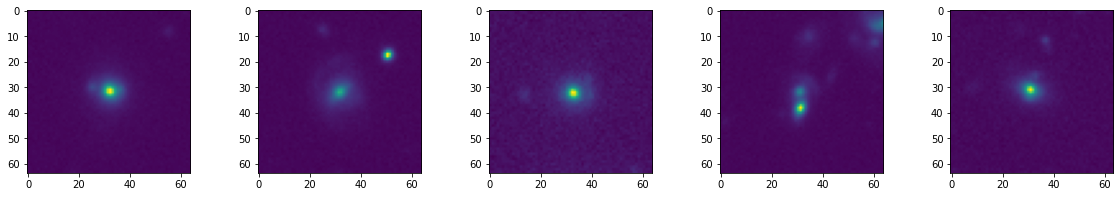

In [12]:
# class 2 plotting
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(np.load(cls2[i])) 

Shape of images -> (64 x 64)

In [13]:
np.shape(np.load(cls1[1]))

(64, 64)

In [14]:
print(len(cls1)) 
print(len(cls2))

40010
467


## Some insights
-> No. of non-lensing images are greater than lensing images (dataset quite unbalanced)

-> Have to apply some tricks to counter this like class weigtage, stratified splitting etc

-> Images look pretty dissimilar on first look, CNNs should classify it without much problem

-> The images are single channeled

In [15]:
os.listdir()

['hsc2.zip',
 'hsc_lens_candidates',
 'hsc',
 'hsc_lens_candidates.zip',
 '__notebook__.ipynb']

In [16]:
shutil.rmtree("./hsc")
shutil.rmtree("./hsc_lens_candidates")

In [17]:
# Creating a dataframe
d = {'path':[f for f in cls1]}
df_p = pd.DataFrame(data=d)
df_p['target'] = 0.

dn = {'path':[f for f in cls2]}
df_n = pd.DataFrame(data=dn)
df_n['target'] = 1.

df= pd.concat([df_p,df_n],ignore_index=True)
df = df.sample(frac = 1).reset_index(drop = True)

In [18]:
y = df.target.values
# using stratified splitting to retain the distribution in each fold
kf = model_selection.StratifiedKFold(n_splits =5, random_state=42, shuffle=True)

for f,(t,v) in enumerate(kf.split(X=df,y=y)):
    df.loc[v,'fold'] = f

In [19]:
#distribution of target in whole data
df.target.value_counts(normalize = True)

0.0    0.988463
1.0    0.011537
Name: target, dtype: float64

In [20]:
#distribution of target in a single fold
df[df.fold == 0].target.value_counts(normalize = True)

0.0    0.988389
1.0    0.011611
Name: target, dtype: float64

In [21]:
df.to_csv('Final_csv.csv', index=False)